## Importing Libraries

In [1]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
from utils import *
from model_3 import *

## Transformations applied on train and test data

In [3]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
                                       transforms.RandomRotation((-15., 15.), fill=0),
                                       transforms.Resize((28, 28)),
                                       transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,))
                                       ])

## Downloading data

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [5]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

## Sample image

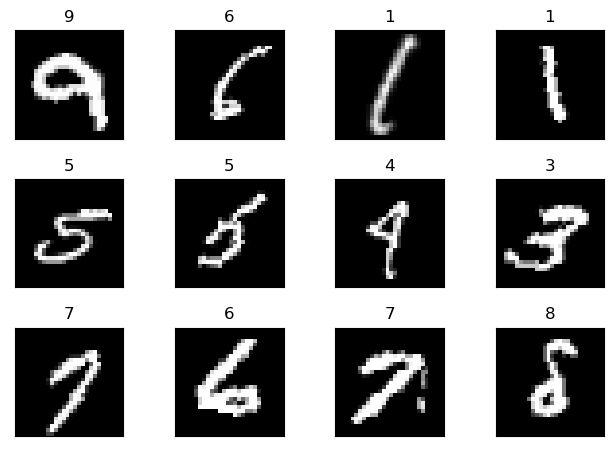

In [6]:

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

## Neural net summary

In [7]:
get_summary(Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,440
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10           [-1, 10, 12, 12]             160
           Conv2d-11           [-1, 16, 10, 10]           1,440
             ReLU-12           [-1, 16, 10, 10]               0
      BatchNorm2d-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

<function torchsummary.torchsummary.summary(model, input_size, batch_size=-1, device='cuda')>

## Training the data and calculating validation results

In [8]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [11]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.8)

# New Line
train_criterion = nn.CrossEntropyLoss() #Loss function
test_criterion = nn.CrossEntropyLoss() #Loss function
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_acc_val, train_loss = train(model, device, train_loader, optimizer, train_criterion)
    print(train_acc_val)
    test_acc_val, test_loss = test(model, device, test_loader, test_criterion)
    
    train_acc.append(train_acc_val) #Storing training loss for each epoch
    train_losses.append(train_loss)
    test_acc.append(test_acc_val) #Storing testing loss for each epoch
    test_losses.append(test_loss)
    
    before_lr = optimizer.param_groups[0]["lr"]
    scheduler.step()
    after_lr = optimizer.param_groups[0]["lr"]
    print("Epoch %d: SGD lr %.4f -> %.4f" % (epoch, before_lr, after_lr))

Epoch 1


Train: Loss=0.0208 Batch_id=937 Accuracy=91.47: 100%|█| 938/938 [01:24<00:00, 11

91.46666666666667


Test set: Average loss: 0.0516, Accuracy: 9844/10000 (98.44%)

Epoch 1: SGD lr 0.0500 -> 0.0400
Epoch 2


Train: Loss=0.0964 Batch_id=937 Accuracy=96.80: 100%|█| 938/938 [01:31<00:00, 10

96.80333333333333


Test set: Average loss: 0.0367, Accuracy: 9877/10000 (98.77%)

Epoch 2: SGD lr 0.0400 -> 0.0320
Epoch 3


Train: Loss=0.0379 Batch_id=937 Accuracy=97.45: 100%|█| 938/938 [01:32<00:00, 10

97.44666666666667


Test set: Average loss: 0.0322, Accuracy: 9909/10000 (99.09%)

Epoch 3: SGD lr 0.0320 -> 0.0256
Epoch 4


Train: Loss=0.1120 Batch_id=937 Accuracy=97.72: 100%|█| 938/938 [01:24<00:00, 11

97.715


Test set: Average loss: 0.0263, Accuracy: 9914/10000 (99.14%)

Epoch 4: SGD lr 0.0256 -> 0.0205
Epoch 5


Train: Loss=0.1783 Batch_id=937 Accuracy=97.88: 100%|█| 938/938 [01:21<00:00, 11

97.875


Test set: Average loss: 0.0249, Accuracy: 9926/10000 (99.26%)

Epoch 5: SGD lr 0.0205 -> 0.0164
Epoch 6


Train: Loss=0.0482 Batch_id=937 Accuracy=98.03: 100%|█| 938/938 [01:19<00:00, 11

98.025


Test set: Average loss: 0.0211, Accuracy: 9932/10000 (99.32%)

Epoch 6: SGD lr 0.0164 -> 0.0131
Epoch 7


Train: Loss=0.0032 Batch_id=937 Accuracy=98.12: 100%|█| 938/938 [01:14<00:00, 12

98.125


Test set: Average loss: 0.0222, Accuracy: 9920/10000 (99.20%)

Epoch 7: SGD lr 0.0131 -> 0.0105
Epoch 8


Train: Loss=0.1443 Batch_id=937 Accuracy=98.23: 100%|█| 938/938 [01:14<00:00, 12

98.235


Test set: Average loss: 0.0215, Accuracy: 9931/10000 (99.31%)

Epoch 8: SGD lr 0.0105 -> 0.0084
Epoch 9


Train: Loss=0.1686 Batch_id=937 Accuracy=98.25: 100%|█| 938/938 [01:18<00:00, 11

98.24666666666667


Test set: Average loss: 0.0199, Accuracy: 9938/10000 (99.38%)

Epoch 9: SGD lr 0.0084 -> 0.0067
Epoch 10


Train: Loss=0.0222 Batch_id=937 Accuracy=98.38: 100%|█| 938/938 [01:18<00:00, 11

98.37833333333333


Test set: Average loss: 0.0209, Accuracy: 9931/10000 (99.31%)

Epoch 10: SGD lr 0.0067 -> 0.0054
Epoch 11


Train: Loss=0.0708 Batch_id=937 Accuracy=98.36: 100%|█| 938/938 [01:21<00:00, 11

98.36166666666666


Test set: Average loss: 0.0202, Accuracy: 9930/10000 (99.30%)

Epoch 11: SGD lr 0.0054 -> 0.0043
Epoch 12


Train: Loss=0.0511 Batch_id=937 Accuracy=98.42: 100%|█| 938/938 [00:50<00:00, 18

98.42


Test set: Average loss: 0.0199, Accuracy: 9928/10000 (99.28%)

Epoch 12: SGD lr 0.0043 -> 0.0034
Epoch 13


Train: Loss=0.0081 Batch_id=937 Accuracy=98.45: 100%|█| 938/938 [00:47<00:00, 19

98.45


Test set: Average loss: 0.0185, Accuracy: 9941/10000 (99.41%)

Epoch 13: SGD lr 0.0034 -> 0.0027
Epoch 14


Train: Loss=0.0189 Batch_id=937 Accuracy=98.48: 100%|█| 938/938 [00:48<00:00, 19

98.47833333333334


Test set: Average loss: 0.0190, Accuracy: 9935/10000 (99.35%)

Epoch 14: SGD lr 0.0027 -> 0.0022
Epoch 15


Train: Loss=0.0618 Batch_id=937 Accuracy=98.40: 100%|█| 938/938 [00:47<00:00, 19

98.39833333333333


Test set: Average loss: 0.0189, Accuracy: 9938/10000 (99.38%)

Epoch 15: SGD lr 0.0022 -> 0.0018


## Plots

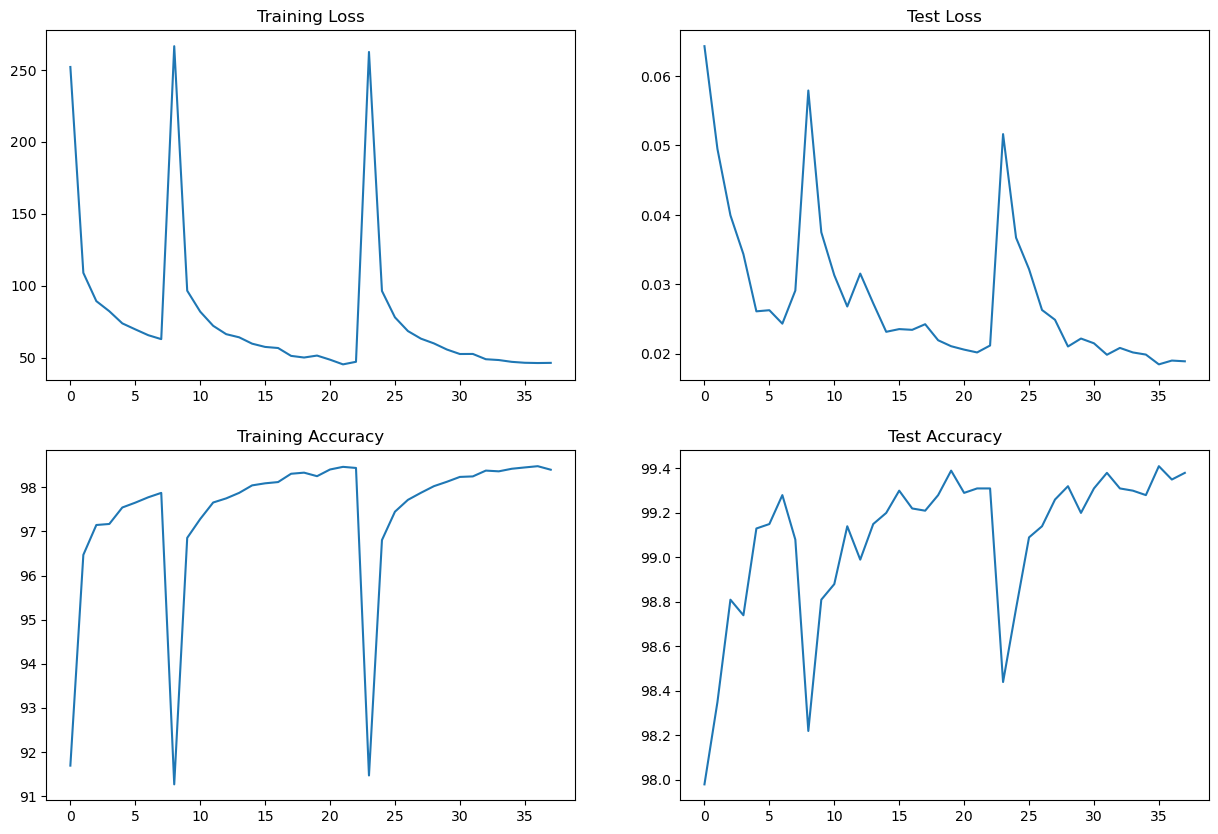

In [12]:
plot_loss(train_losses, train_acc, test_losses, test_acc)


### Target:

* Add Exponential LR to reduce fluctuation in the accuracies
* Reduce the batch size to increase the number of times the weights are updated
* Reduce epoch to 15
* Reduce the number of channels to match the assignment requirements and still try to maintain the accuracy (Had multiple tries on this. (Sub-optimal channel sizes like 10, 20 are used in the code to stick to the model parameter requirements.)
* Higher difference between training and test means that the training accuracy has scope of increasing. Hence the skeleton is slightly changed to accomodate more layers. 

### Results:
* Parameters: 7986
* Best Training Accuracy: 98.48
* Best Test Accuracy: 99.41

### Analysis:
* Tried Exponential LR, step LR, LR on plateau. I got better accuracy on exponential LR. LR on plateau might yield better results had I used the right parameters. Open to suggestions on this one.
* The test accuracy touched 99.4 but not very consistent. Better LR formula might have given stable and consistent accuracy